In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.figsize"] = (6,4)

from labellines import labelLines

In [8]:
from fieldsValues import case

import postCodes.cf_cp_wall as coef
import postCodes.residuals as residuals
import postCodes.wallLaw as wall

In [9]:
cf_lower,cf_upper = coef.get_cp(case)

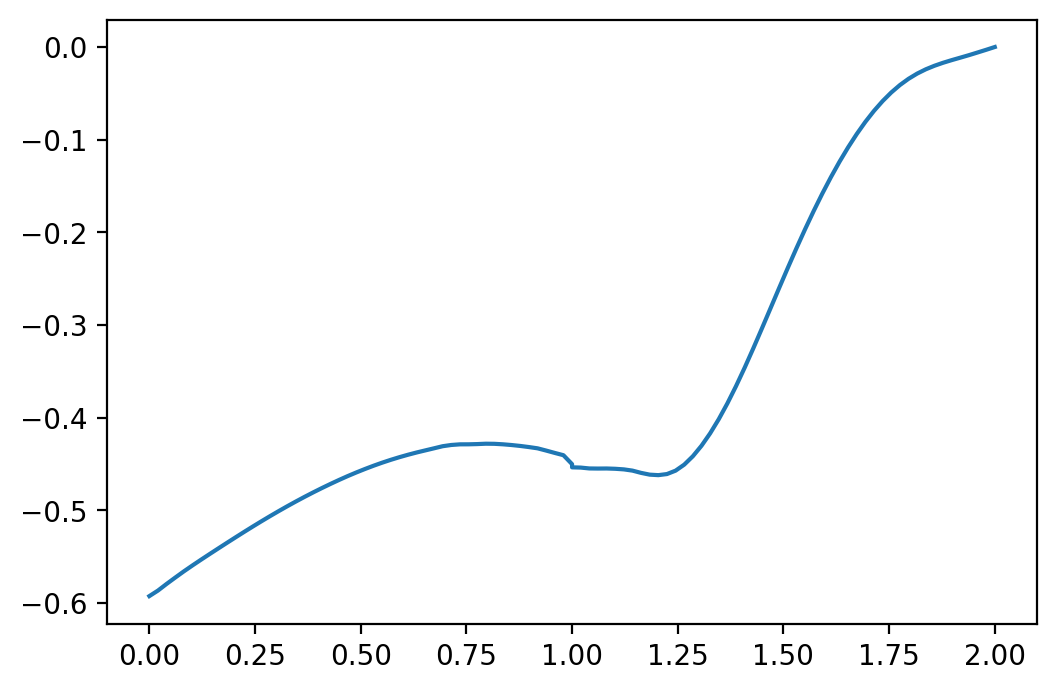

In [10]:
plt.plot(cf_lower['x'],cf_lower['cp'])

In [12]:
data = residuals.get_residuals()

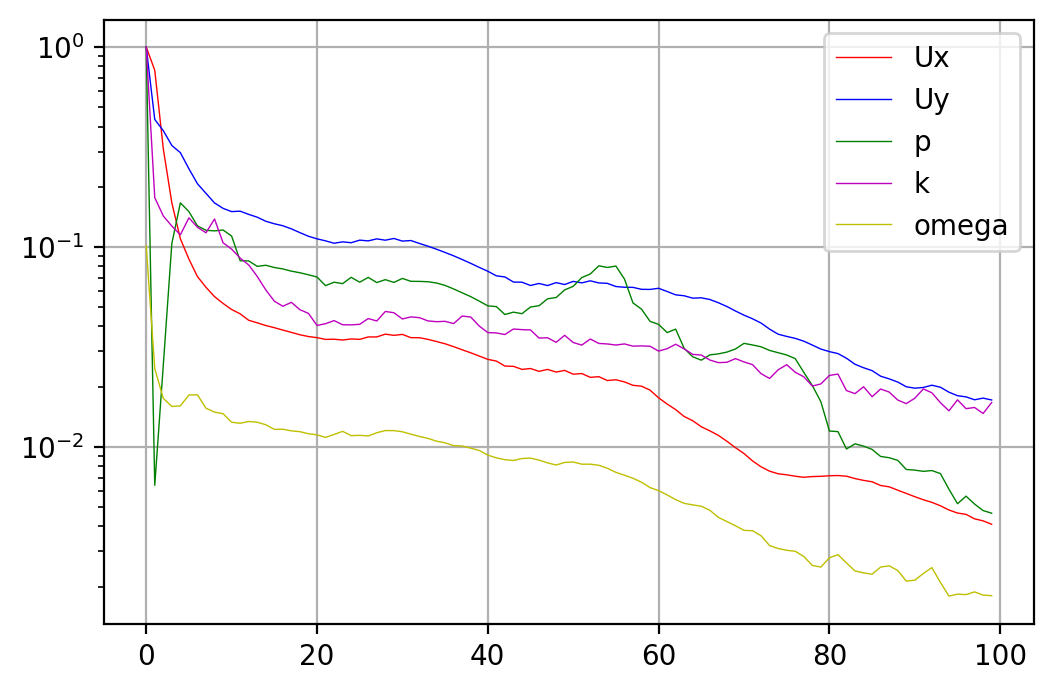

In [13]:
plt.plot(data['Ux'], linewidth=0.5, label='Ux', c='r')
plt.plot(data['Uy'], linewidth=0.5, label='Uy', c='b')
plt.plot(data['p'], linewidth=0.5, label='p', c='g')
plt.plot(data['k'], linewidth=0.5, label='k', c='m')
plt.plot(data['omega'], linewidth=0.5, label='omega', c='y')


plt.legend()
plt.grid()
plt.yscale('log')

In [14]:
wall.get_wall('X1','down',case)

(8.90816e-06,
              y         Ux
 0     0.000000   7.397909
 1     0.119626   7.397909
 2     0.239251   7.397909
 3     0.358875   7.397909
 4     0.478503   7.397909
 ..         ...        ...
 495  59.214642  12.408373
 496  59.334326  12.408373
 497  59.453712  12.408373
 498  59.573397  12.408373
 499  59.693082  13.488565
 
 [500 rows x 2 columns])